In [15]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [16]:
raw_train_df = pd.read_csv('/opt/ml/input/data/train_data.csv')

In [17]:
train_df = pd.read_csv('/opt/ml/input/data/train_data.csv')
train_df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [18]:
train_df.insert(1, "testType", np.NaN)
train_df.insert(2, "testID", np.NaN)
train_df.insert(3, "questionID", np.NaN)

In [19]:
train_df

,userID,testType,testID,questionID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,NaN,NaN,NaN,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,NaN,NaN,NaN,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,NaN,NaN,NaN,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,NaN,NaN,NaN,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,NaN,NaN,NaN,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...,...,...,...
2266581,7441,NaN,NaN,NaN,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,NaN,NaN,NaN,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,NaN,NaN,NaN,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,NaN,NaN,NaN,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [20]:
train_np = train_df.to_numpy()

In [21]:
for i in range(len(train_np)):
    assessmentItemID = str(train_np[i][4])
    train_np[i][1] = int(assessmentItemID[2])
    train_np[i][2] = int(assessmentItemID[4:7])
    train_np[i][3] = int(assessmentItemID[8:])

In [22]:
train_df = pd.DataFrame(train_np, columns=train_df.columns)
train_df

,userID,testType,testID,questionID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,6,1,1,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,6,1,2,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,6,1,3,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,6,1,4,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,6,1,5,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...,...,...,...
2266581,7441,3,71,5,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,4,165,1,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,4,165,2,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,4,165,3,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [23]:
train_df.insert(7, "solveTime", np.NaN)
train_df

,userID,testType,testID,questionID,assessmentItemID,testId,answerCode,solveTime,Timestamp,KnowledgeTag
0,0,6,1,1,A060001001,A060000001,1,NaN,2020-03-24 00:17:11,7224
1,0,6,1,2,A060001002,A060000001,1,NaN,2020-03-24 00:17:14,7225
2,0,6,1,3,A060001003,A060000001,1,NaN,2020-03-24 00:17:22,7225
3,0,6,1,4,A060001004,A060000001,1,NaN,2020-03-24 00:17:29,7225
4,0,6,1,5,A060001005,A060000001,1,NaN,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...,...,...,...,...
2266581,7441,3,71,5,A030071005,A030000071,0,NaN,2020-06-05 06:50:21,438
2266582,7441,4,165,1,A040165001,A040000165,1,NaN,2020-08-21 01:06:39,8836
2266583,7441,4,165,2,A040165002,A040000165,1,NaN,2020-08-21 01:06:50,8836
2266584,7441,4,165,3,A040165003,A040000165,1,NaN,2020-08-21 01:07:36,8836


In [24]:
train_np = train_df.to_numpy()

for i in range(len(train_np)-1):
    # 현재 문제의 timestamp을 가져온다
    current_date_data, current_time_data = train_np[i][8].strip().split(" ")
    current_year, current_month, current_day = map(int, list(current_date_data.split("-")))
    current_hour, current_minute, current_second = map(int, list(current_time_data.split(":")))

    # 다음 문제의 timestamp를 가져온다.
    next_date_data, next_time_data = train_np[i+1][8].strip().split(" ")
    next_year, next_month, next_day = map(int, list(next_date_data.split("-")))
    next_hour, next_minute, next_second = map(int, list(next_time_data.split(":")))


    # 같은 유저가 다음 문제도 같은 시험지를 풀고 았거나, 
    # 다른 시험 문제지를 같은 날짜에 풀었을 경우
    # 문제 푸는 시간 = 다음 문제가 시작 시간 - 현재 문제가 시작한 시간
    if train_np[i][0]==train_np[i+1][0] and \
        (train_np[i][5]==train_np[i+1][5] or (train_np[i][5]!=train_np[i+1][5] and current_date_data == next_date_data)):         
        train_np[i][7] = datetime.datetime(next_year, next_month, next_day, next_hour, next_minute, next_second) - datetime.datetime(current_year, current_month, current_day, current_hour, current_minute, current_second)
        train_np[i][7] = train_np[i][7].total_seconds() # 초로 변환
    else :
        # 마지막으로 푼 문제인 경우는 60으로 통일
        train_np[i][7] = 60

train_np[-1][7] = 60

In [25]:
train_final_df = pd.DataFrame(train_np, columns=train_df.columns)
train_final_df

,userID,testType,testID,questionID,assessmentItemID,testId,answerCode,solveTime,Timestamp,KnowledgeTag
0,0,6,1,1,A060001001,A060000001,1,3.0,2020-03-24 00:17:11,7224
1,0,6,1,2,A060001002,A060000001,1,8.0,2020-03-24 00:17:14,7225
2,0,6,1,3,A060001003,A060000001,1,7.0,2020-03-24 00:17:22,7225
3,0,6,1,4,A060001004,A060000001,1,7.0,2020-03-24 00:17:29,7225
4,0,6,1,5,A060001005,A060000001,1,11.0,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...,...,...,...,...
2266581,7441,3,71,5,A030071005,A030000071,0,60,2020-06-05 06:50:21,438
2266582,7441,4,165,1,A040165001,A040000165,1,11.0,2020-08-21 01:06:39,8836
2266583,7441,4,165,2,A040165002,A040000165,1,46.0,2020-08-21 01:06:50,8836
2266584,7441,4,165,3,A040165003,A040000165,1,73.0,2020-08-21 01:07:36,8836


In [26]:
train_final_df[train_final_df['solveTime']==0]

,userID,testType,testID,questionID,assessmentItemID,testId,answerCode,solveTime,Timestamp,KnowledgeTag
122,0,8,16,7,A080016007,A080000016,1,0.0,2020-05-07 00:52:47,4672
145,0,8,20,7,A080020007,A080000020,0,0.0,2020-05-14 01:35:29,4673
262,0,8,39,3,A080039003,A080000039,0,0.0,2020-06-11 02:02:22,4688
468,0,8,78,7,A080078007,A080000078,1,0.0,2020-08-29 00:26:11,3097
552,0,8,90,3,A080090003,A080000090,0,0.0,2020-09-18 20:13:07,1110
...,...,...,...,...,...,...,...,...,...,...
2264236,7297,6,152,4,A060152004,A060000152,0,0.0,2020-09-29 08:59:29,1458
2264343,7303,3,179,3,A030179003,A030000179,0,0.0,2020-08-11 08:17:00,1935
2264691,7320,8,106,7,A080106007,A080000106,0,0.0,2020-11-06 06:47:34,1182
2265774,7387,7,81,5,A070081005,A070000081,0,0.0,2020-04-21 03:12:08,9186


In [46]:
tmp = train_final_df[train_final_df['assessmentItemID']=='A080016004']
tmp['solveTime'].min()

0.0

In [47]:
tmp['solveTime'].max()

5147.0

In [48]:
tmp['solveTime'].median()

60.0

In [49]:
tmp['solveTime'].mean()

194.0074074074074

In [35]:
tmp[tmp['answerCode']==0]

,userID,testType,testID,questionID,assessmentItemID,testId,answerCode,solveTime,Timestamp,KnowledgeTag
118,0,8,16,4,A080016004,A080000016,0,1.0,2020-05-07 00:50:00,4669
123,0,8,16,8,A080016008,A080000016,0,60,2020-05-07 00:52:47,4672
25525,34,8,16,2,A080016002,A080000016,0,86.0,2020-06-17 03:58:29,4669
25526,34,8,16,3,A080016003,A080000016,0,252.0,2020-06-17 03:59:55,4665
25527,34,8,16,4,A080016004,A080000016,0,1093.0,2020-06-17 04:04:07,4669
...,...,...,...,...,...,...,...,...,...,...
2128543,5019,8,16,4,A080016004,A080000016,0,5.0,2020-08-08 05:05:10,4669
2128544,5019,8,16,5,A080016005,A080000016,0,4.0,2020-08-08 05:05:15,4669
2128545,5019,8,16,6,A080016006,A080000016,0,4.0,2020-08-08 05:05:19,4664
2128546,5019,8,16,7,A080016007,A080000016,0,4.0,2020-08-08 05:05:23,4672


In [56]:
resut_list = list()

for userID in train_final_df['userID'].unique():
    tmp = train_final_df[train_final_df['userID']==userID]
    if tmp['assessmentItemID'].nunique() != len(tmp):
        resut_list.append(userID)
print(resut_list)

[1, 6, 16, 34, 40, 54, 65, 67, 68, 69, 72, 80, 83, 86, 98, 99, 104, 112, 115, 116, 117, 121, 122, 127, 133, 135, 143, 144, 155, 157, 158, 160, 165, 166, 174, 176, 183, 186, 195, 208, 218, 221, 230, 248, 251, 261, 263, 265, 271, 275, 276, 287, 290, 294, 307, 314, 316, 319, 320, 327, 330, 332, 333, 344, 348, 353, 354, 360, 365, 379, 383, 393, 394, 397, 399, 405, 408, 409, 411, 413, 419, 424, 429, 457, 461, 469, 470, 473, 483, 485, 487, 498, 500, 502, 504, 509, 513, 517, 523, 526, 529, 530, 531, 534, 535, 537, 547, 554, 555, 562, 588, 589, 597, 599, 602, 607, 608, 609, 612, 619, 623, 631, 637, 644, 658, 661, 665, 675, 693, 706, 711, 720, 721, 724, 726, 728, 733, 743, 746, 749, 753, 769, 777, 778, 779, 780, 782, 787, 788, 790, 796, 810, 811, 823, 828, 840, 850, 854, 858, 862, 868, 875, 897, 909, 910, 911, 914, 921, 924, 927, 930, 934, 936, 943, 950, 959, 960, 961, 965, 968, 990, 1004, 1005, 1017, 1019, 1023, 1031, 1035, 1038, 1041, 1043, 1048, 1049, 1055, 1057, 1062, 1063, 1067, 1069, 1073

In [68]:
tmp = train_final_df[train_final_df['userID']==7329]
len(tmp)

18

In [69]:
tmp['assessmentItemID'].nunique()

14

In [71]:
tmp_count = tmp.groupby('assessmentItemID').count()
tmp_count[tmp_count['Timestamp']>=2]

,userID,testType,testID,questionID,testId,answerCode,solveTime,Timestamp,KnowledgeTag
assessmentItemID,,,,,,,,,
A040198001,2,2,2,2,2,2,2,2,2
A040198002,2,2,2,2,2,2,2,2,2
A040198003,2,2,2,2,2,2,2,2,2
A040198004,2,2,2,2,2,2,2,2,2


In [74]:
tmp[tmp['assessmentItemID']=="A040198003"]

,userID,testType,testID,questionID,assessmentItemID,testId,answerCode,solveTime,Timestamp,KnowledgeTag
2264851,7329,4,198,3,A040198003,A040000198,1,8.0,2020-01-02 12:50:56,2133
2264865,7329,4,198,3,A040198003,A040000198,1,6.0,2020-10-12 12:09:02,2133


In [53]:
train_final_df.groupby('userID').count().sort_values('assessmentItemID')

,testType,testID,questionID,assessmentItemID,testId,answerCode,solveTime,Timestamp,KnowledgeTag
userID,,,,,,,,,
7441,9,9,9,9,9,9,9,9,9
7390,13,13,13,13,13,13,13,13,13
7414,13,13,13,13,13,13,13,13,13
7252,13,13,13,13,13,13,13,13,13
7396,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...
926,1773,1773,1773,1773,1773,1773,1773,1773,1773
394,1774,1774,1774,1774,1774,1774,1774,1774,1774
1112,1777,1777,1777,1777,1777,1777,1777,1777,1777


In [55]:
tmp = train_final_df[train_final_df['userID']==730]
tmp['assessmentItemID'].nunique()

1860

In [31]:
tmp = train_final_df[train_final_df['solveTime']==0]
tmp[tmp['answerCode']==1]

,userID,testType,testID,questionID,assessmentItemID,testId,answerCode,solveTime,Timestamp,KnowledgeTag
122,0,8,16,7,A080016007,A080000016,1,0.0,2020-05-07 00:52:47,4672
468,0,8,78,7,A080078007,A080000078,1,0.0,2020-08-29 00:26:11,3097
555,0,8,92,3,A080092003,A080000092,1,0.0,2020-09-22 18:57:09,8931
1958,5,8,1,5,A080001005,A080000001,1,0.0,2020-02-12 20:03:07,1397
1986,5,8,9,3,A080009003,A080000009,1,0.0,2020-02-26 19:25:32,1444
...,...,...,...,...,...,...,...,...,...,...
2257795,6989,7,18,11,A070018011,A070000018,1,0.0,2020-02-04 06:05:36,5619
2258130,7000,8,105,6,A080105006,A080000105,1,0.0,2020-10-16 10:03:39,1182
2259204,7046,9,1,2,A090001002,A090000001,1,0.0,2020-03-23 07:49:23,4697
2263215,7239,7,161,4,A070161004,A070000161,1,0.0,2020-12-23 10:25:42,9124


In [32]:
tmp[tmp['answerCode']==0]

,userID,testType,testID,questionID,assessmentItemID,testId,answerCode,solveTime,Timestamp,KnowledgeTag
145,0,8,20,7,A080020007,A080000020,0,0.0,2020-05-14 01:35:29,4673
262,0,8,39,3,A080039003,A080000039,0,0.0,2020-06-11 02:02:22,4688
552,0,8,90,3,A080090003,A080000090,0,0.0,2020-09-18 20:13:07,1110
558,0,8,92,5,A080092005,A080000092,0,0.0,2020-09-22 19:02:06,1110
1998,5,8,11,8,A080011008,A080000011,0,0.0,2020-02-28 20:07:30,4661
...,...,...,...,...,...,...,...,...,...,...
2264236,7297,6,152,4,A060152004,A060000152,0,0.0,2020-09-29 08:59:29,1458
2264343,7303,3,179,3,A030179003,A030000179,0,0.0,2020-08-11 08:17:00,1935
2264691,7320,8,106,7,A080106007,A080000106,0,0.0,2020-11-06 06:47:34,1182
2265774,7387,7,81,5,A070081005,A070000081,0,0.0,2020-04-21 03:12:08,9186


In [17]:
print(train_final_df.loc[552])
print("========================================")
print(train_final_df.loc[553])

userID                                0
testType                              8
testID                               90
questionID                            3
assessmentItemID             A080090003
testId                       A080000090
answerCode                            0
solveTime                           0.0
Timestamp           2020-09-18 20:13:07
KnowledgeTag                       1110
Name: 552, dtype: object
userID                                0
testType                              8
testID                               90
questionID                            2
assessmentItemID             A080090002
testId                       A080000090
answerCode                            1
solveTime                            60
Timestamp           2020-09-18 20:13:07
KnowledgeTag                       1110
Name: 553, dtype: object


### assessmentItemID와 testId이 동일한지 확인

In [27]:
not_equal_idx = list()

for i in range(len(train_np)):
    testId = train_np[i][5]
    if train_np[i][2] < 10:
        assessmentItemID_to_testId = f"A0{train_np[i][1]}000000{train_np[i][2]}"
    elif train_np[i][2] < 100:
        assessmentItemID_to_testId = f"A0{train_np[i][1]}00000{train_np[i][2]}"
    else:
        assessmentItemID_to_testId = f"A0{train_np[i][1]}0000{train_np[i][2]}"

    if testId != assessmentItemID_to_testId:
        not_equal_idx.append(i)

In [28]:
print(not_equal_idx)
print("=>모두 다 동일!")

[]
=>모두 다 동일!


<AxesSubplot:>

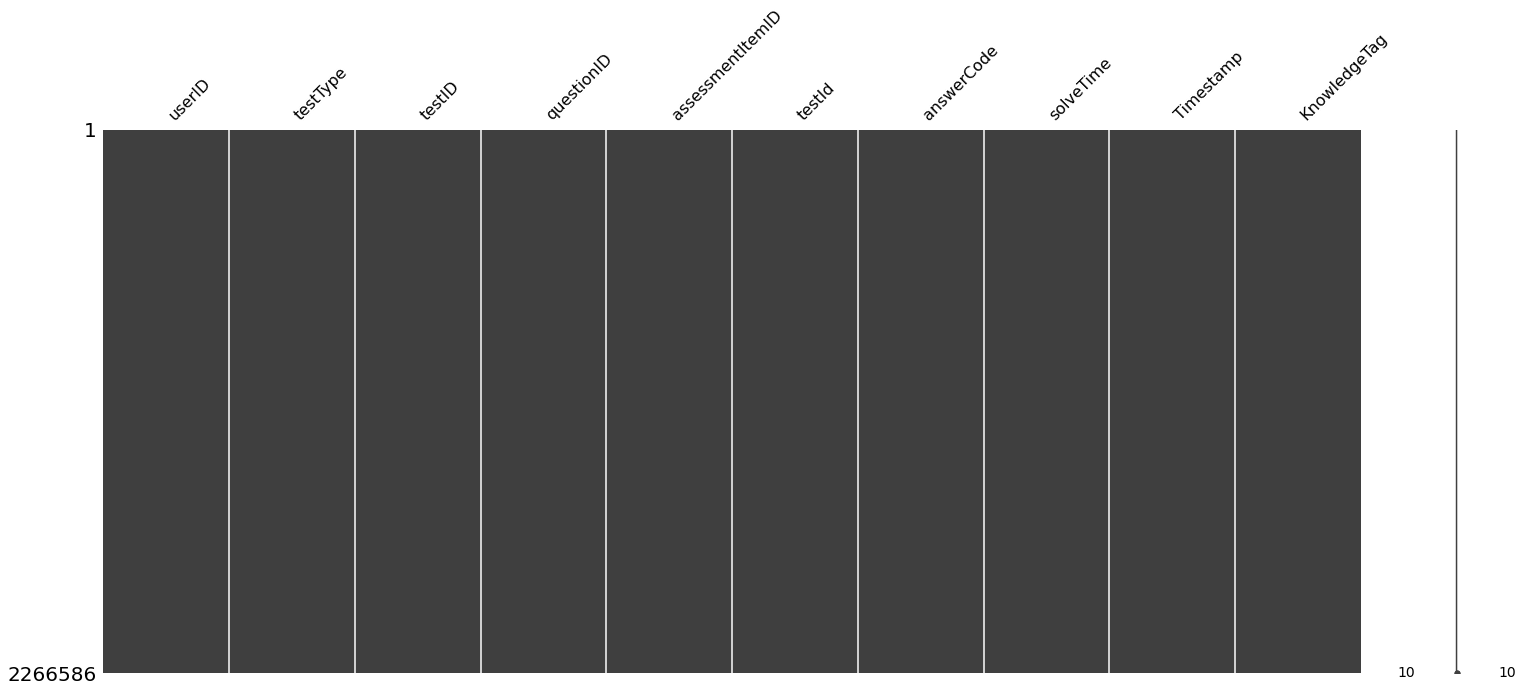

In [29]:
missingno.matrix(train_final_df)

In [32]:
print("*** 문제별 문제 해결 최대 소요 시간 ***")
train_max_df = train_final_df.loc[:,['assessmentItemID','solveTime']].groupby('assessmentItemID').max()
train_max_df

*** 문제별 문제 해결 최대 소요 시간 ***


,solveTime
assessmentItemID,
A010001001,711.0
A010001002,28744.0
A010001003,42797.0
A010001004,1127.0
A010001005,60.0
...,...
A090074002,239.0
A090074003,105.0
A090074004,386.0


In [34]:
train_max_df.sort_values('solveTime')

,solveTime
assessmentItemID,
A090008005,60.0
A050179007,60.0
A010181004,60.0
A030051005,60.0
A020139006,60.0
...,...
A080028008,2248875.0
A090043008,2572913.0
A080073008,3265316.0


<AxesSubplot:ylabel='solveTime'>

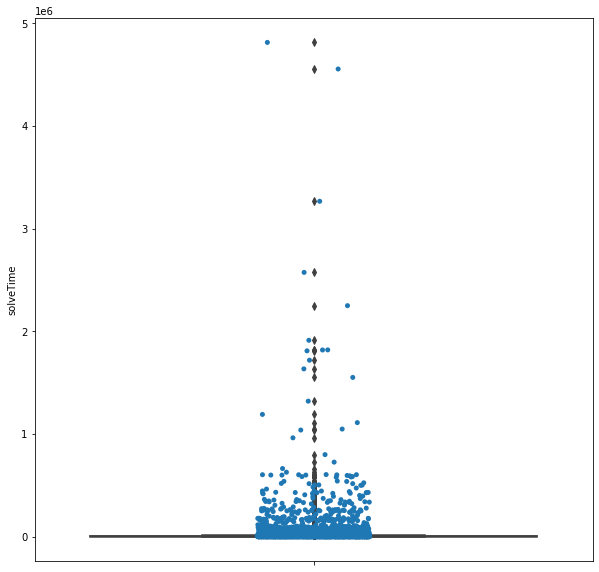

In [155]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=train_max_df['solveTime'])
sns.stripplot(y=train_max_df['solveTime'])

In [35]:
print("*** 문제별 문제 해결 최소 소요 시간 ***")
train_min_df = train_final_df.loc[:,['assessmentItemID','solveTime']].groupby('assessmentItemID').min()
train_min_df

*** 문제별 문제 해결 최소 소요 시간 ***


,solveTime
assessmentItemID,
A010001001,3.0
A010001002,4.0
A010001003,2.0
A010001004,5.0
A010001005,11.0
...,...
A090074002,1.0
A090074003,0.0
A090074004,1.0


In [36]:
train_min_df.sort_values('solveTime')

,solveTime
assessmentItemID,
A090074006,0.0
A070116003,0.0
A070116001,0.0
A070115008,0.0
A070115007,0.0
...,...
A020086010,60.0
A020015005,60.0
A010011005,60.0


<AxesSubplot:ylabel='solveTime'>

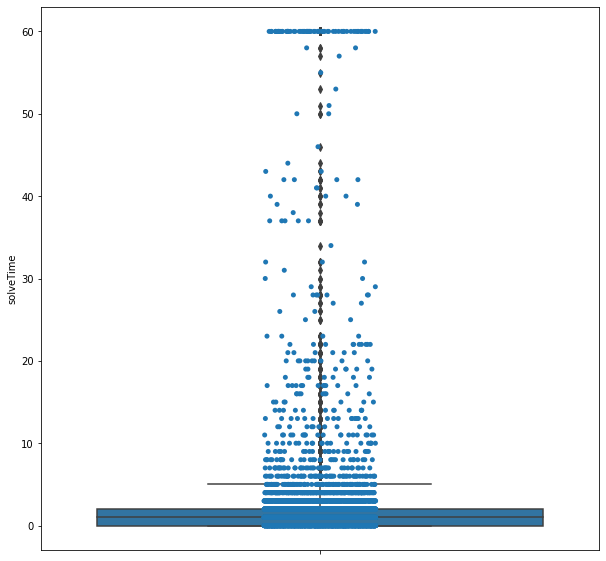

In [160]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=train_min_df['solveTime'])
sns.stripplot(y=train_min_df['solveTime'])

In [38]:
print("*** 문제별 문제 해결 시간 중간값 ***")
train_median_df = train_final_df.loc[:,['assessmentItemID','solveTime']].groupby('assessmentItemID').median()
train_median_df

*** 문제별 문제 해결 시간 중간값 ***


,solveTime
assessmentItemID,
A010001001,18.0
A010001002,12.0
A010001003,29.0
A010001004,38.0
A010001005,60.0
...,...
A090074002,14.0
A090074003,10.0
A090074004,3.0


In [39]:
train_median_df.sort_values('solveTime')

,solveTime
assessmentItemID,
A090025004,3.0
A090040004,3.0
A080071006,3.0
A080071005,3.0
A080057007,3.0
...,...
A060165003,177.0
A030132001,180.5
A030133001,223.5


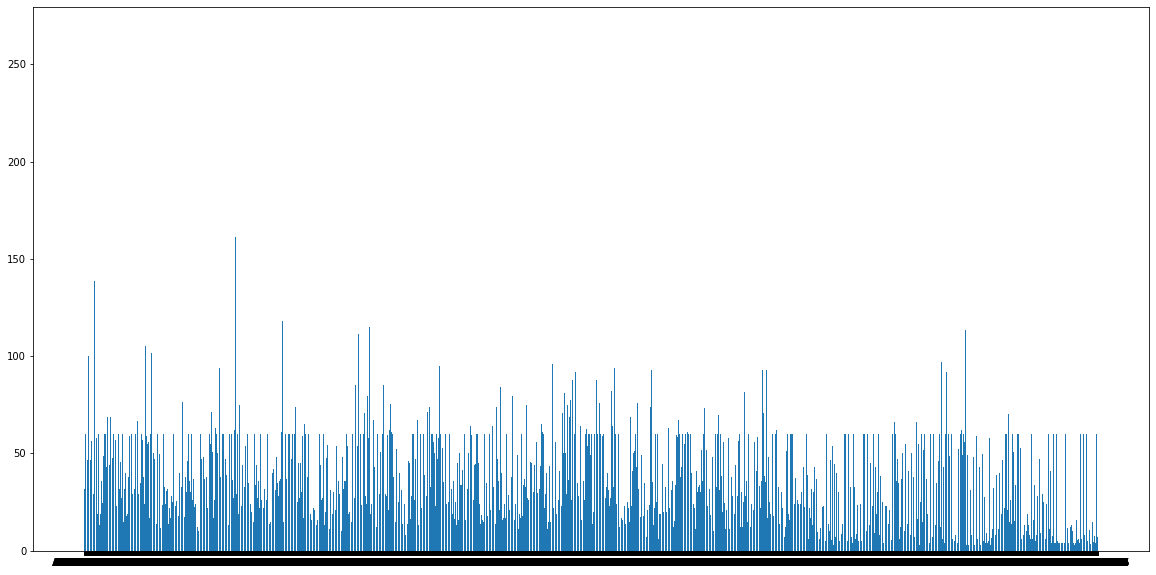

In [161]:
plt.figure(figsize=(20, 10))
plt.bar(train_final_df['assessmentItemID'].unique(), train_median_df['solveTime'])
plt.show()

In [40]:
print("*** 문제별 문제 해결 시간 평균값 ***")
train_mean_df = train_final_df.loc[:,['assessmentItemID','solveTime']].groupby('assessmentItemID').mean()
train_mean_df

*** 문제별 문제 해결 시간 평균값 ***


,solveTime
assessmentItemID,
A010001001,28.529968
A010001002,107.876972
A010001003,180.586751
A010001004,56.116719
A010001005,59.813880
...,...
A090074002,44.444444
A090074003,19.911111
A090074004,33.888889


In [41]:
train_mean_df.sort_values('solveTime')

,solveTime
assessmentItemID,
A010022002,10.932907
A020015001,11.768061
A060097004,11.780269
A090070007,12.186047
A020016001,12.352273
...,...
A070117007,8733.577273
A080073008,9052.410468
A010146005,9976.902256


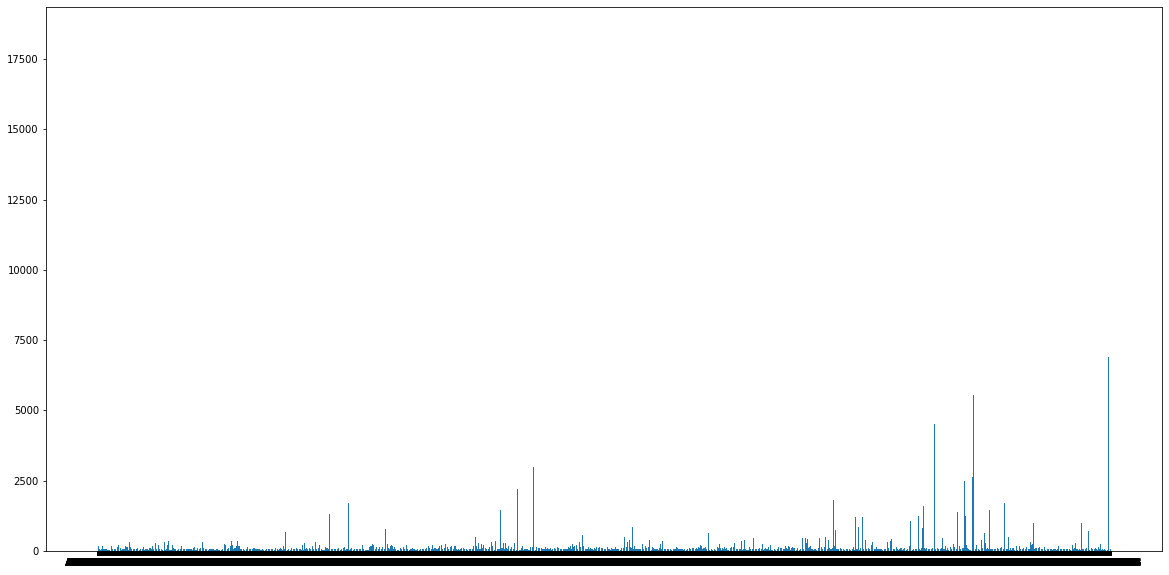

In [140]:
plt.figure(figsize=(20, 10))
plt.bar(train_final_df['assessmentItemID'].unique(), train_mean_df['solveTime'])
plt.show()

<AxesSubplot:ylabel='solveTime'>

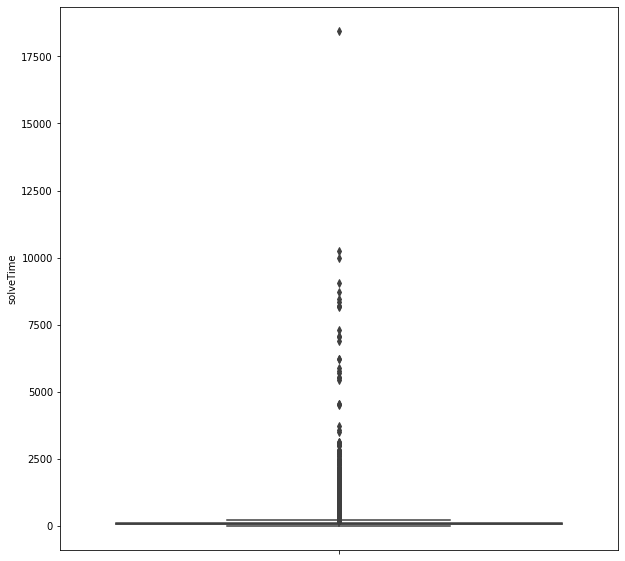

In [176]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=train_mean_df['solveTime'])
sns.stripplot(y=train_mean_df['solveTime'])

In [30]:
print("*** 문제별 문제 해결 시간 분산값 ***")
train_std_df = train_final_df.loc[:,['assessmentItemID','solveTime']].groupby('assessmentItemID').std()
train_std_df

*** 문제별 문제 해결 시간 분산값 ***


,solveTime
assessmentItemID,
A010001001,54.133244
A010001002,1613.532429
A010001003,2403.342598
A010001004,83.512651
A010001005,9862.280804
...,...
A090074002,52.691881
A090074003,24.800863
A090074004,74.619709


In [31]:
train_std_df.sort_values('solveTime')

,solveTime
assessmentItemID,
A050001007,8.795201
A020033005,12.221357
A010146004,14.735242
A010148004,14.819855
A010022002,14.922190
...,...
A070117007,128877.393821
A090043008,144967.049702
A080073008,171501.722882


In [76]:
train_final_df[train_final_df['assessmentItemID']=='A040075005']

,userID,testType,testID,questionID,assessmentItemID,testId,answerCode,solveTime,Timestamp,KnowledgeTag
832,1,4,75,5,A040075005,A040000075,1,60,2020-03-03 07:22:46,2085
5383,9,4,75,5,A040075005,A040000075,1,60,2020-06-24 08:26:34,2085
52590,71,4,75,5,A040075005,A040000075,0,60,2020-04-23 10:51:34,2085
62915,84,4,75,5,A040075005,A040000075,1,60,2020-06-04 08:34:30,2085
65035,86,4,75,5,A040075005,A040000075,1,60,2020-07-20 09:18:24,2085
...,...,...,...,...,...,...,...,...,...,...
2076568,4619,4,75,5,A040075005,A040000075,1,60,2020-05-21 23:14:12,2085
2085359,4684,4,75,5,A040075005,A040000075,0,60,2020-08-31 01:13:59,2085
2090591,4722,4,75,5,A040075005,A040000075,1,60,2020-10-13 00:13:14,2085
2191823,5670,4,75,5,A040075005,A040000075,1,60,2020-06-25 07:40:27,2085


In [78]:
tmp = train_final_df.loc[:,['testId','questionID']]
tmp[tmp['testId']=='A040000075']['questionID'].unique()

array([1, 2, 3, 4, 5], dtype=object)

<AxesSubplot:ylabel='solveTime'>

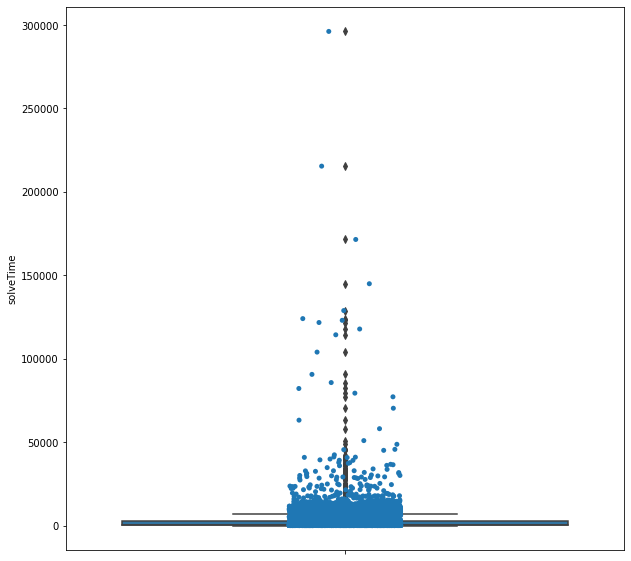

In [32]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=train_std_df['solveTime'])
sns.stripplot(y=train_std_df['solveTime'])

In [33]:
train_final_df.describe()

,userID,testType,testID,questionID,assessmentItemID,testId,answerCode,solveTime,Timestamp,KnowledgeTag
count,2266586,2266586,2266586,2266586,2266586,2266586,2266586,2266586.0,2266586,2266586
unique,6698,9,198,13,9454,1537,2,31745.0,2076774,912
top,730,7,17,1,A090014004,A080000128,1,60.0,2020-10-15 08:59:56,7597
freq,1860,279164,17739,371755,454,3960,1483205,295200.0,7,12892
